# <font color='red'>Lab Assignment 07: Support Vector Machine</font>
### Kaustubh Raykar
PRN : 21070126048   <br> AIML A3 <br> 
### <font color='BLUE'>Dream Housing Finance Company Data Set</font>

### <font color='teal'>Importing Libraries </font>

In [116]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


### <font color='teal'>Upload Dataset </font>

In [117]:
df = pd.read_excel('/content/test.xlsx')

In [118]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,7,1,1,0,0,2333,1516.0,95,360,2,1
1,8,1,1,3,0,3036,2504.0,158,360,0,0
2,13,1,1,2,0,3073,8106.0,200,360,2,1
3,20,1,1,0,1,2600,3500.0,115,0,2,1
4,22,1,1,1,0,5955,5625.0,315,360,2,1


### <font color='teal'>Data Description </font>

In [119]:
df.shape 

(177, 11)

In [120]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [121]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [133]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Property_Area          int64
Loan_Status            int64
dtype: object

### <font color='teal'>Data Visualisation , EDA </font> 

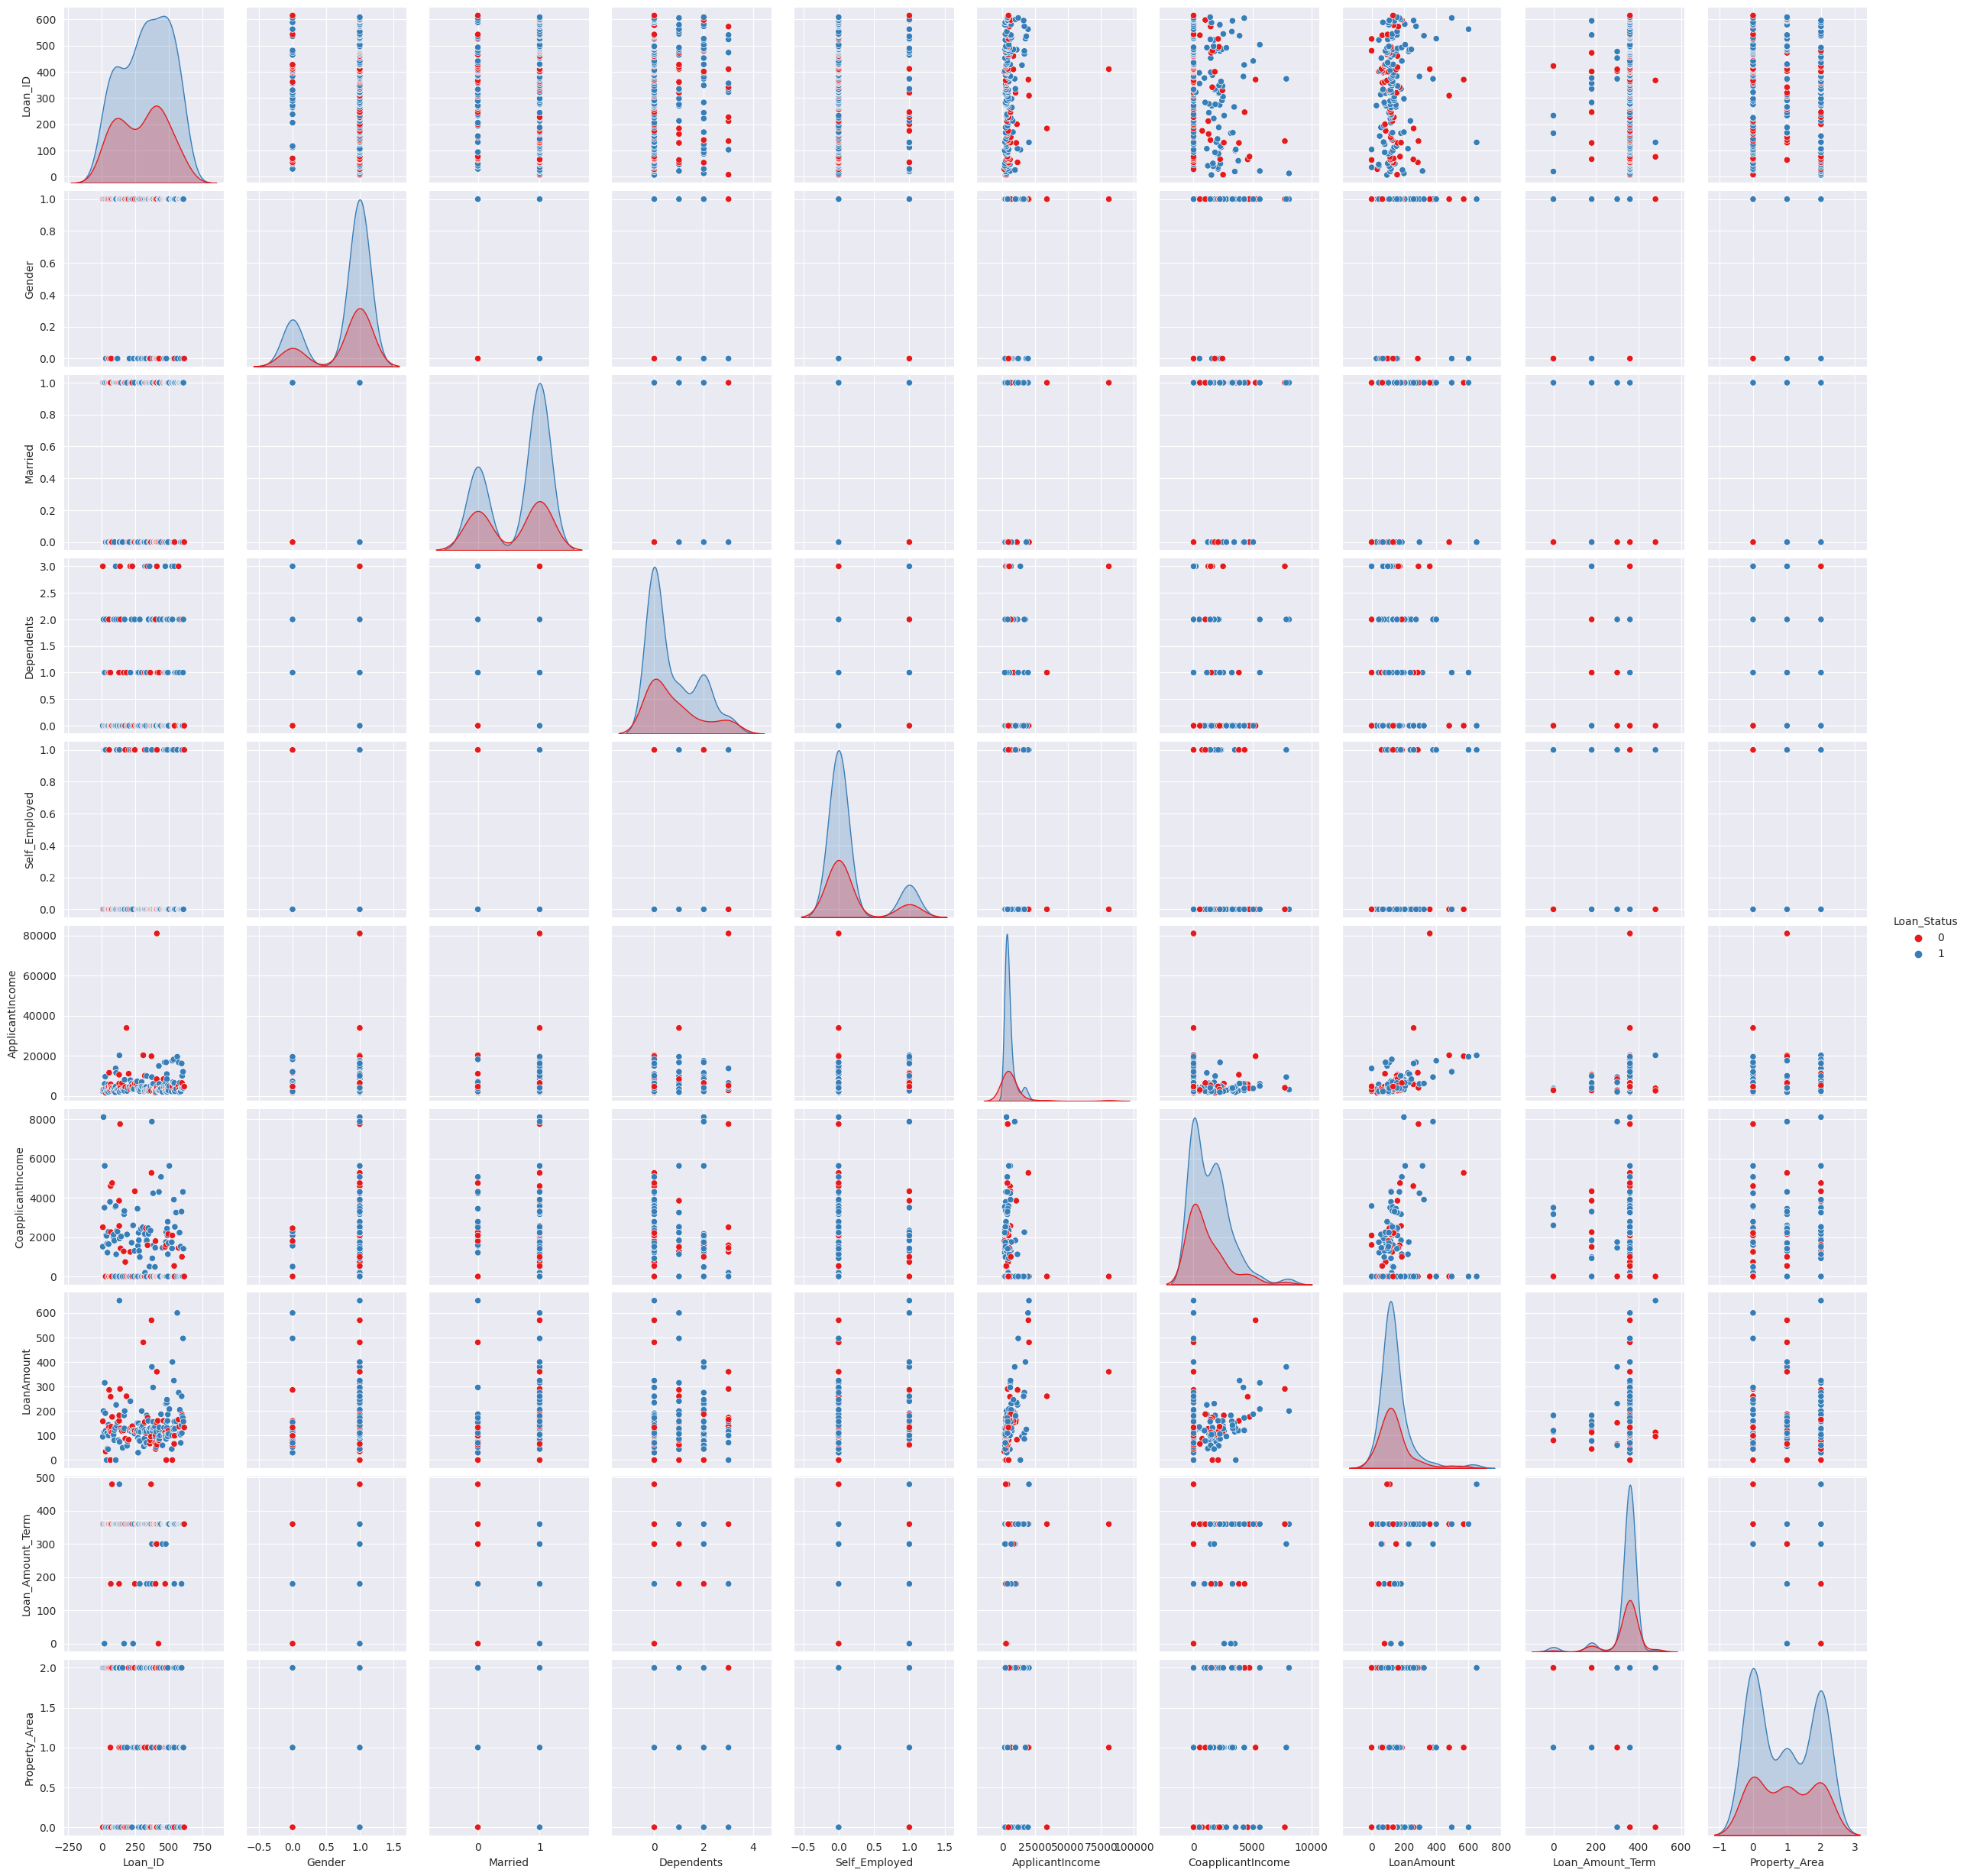

In [138]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']), hue='Loan_Status', palette='Set1')
plt.show()

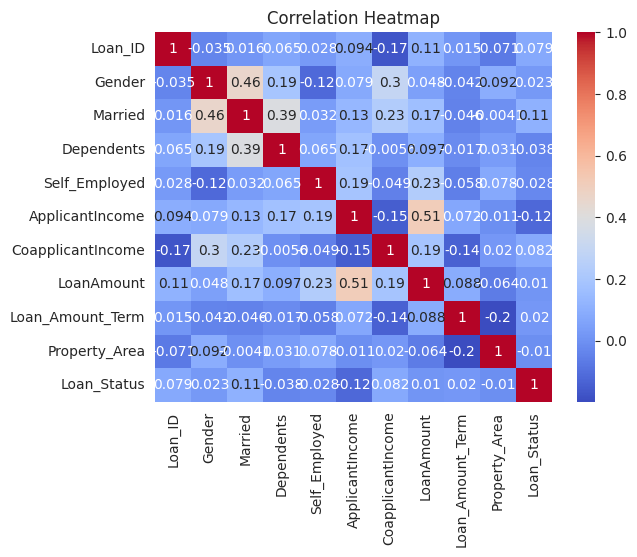

In [139]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='Loan_Status', ylabel='count'>

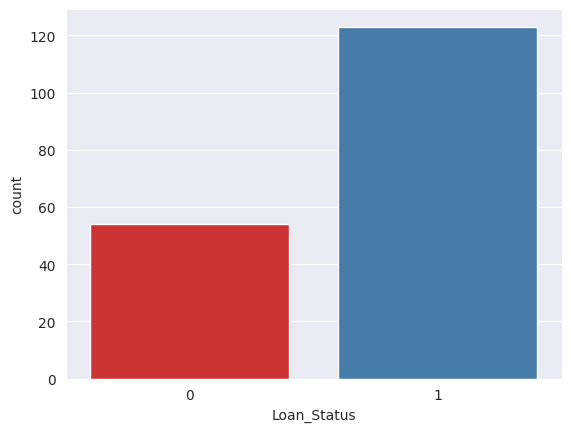

In [140]:
sns.set_style('darkgrid')
sns.countplot(x='Loan_Status', data=df, palette='Set1')

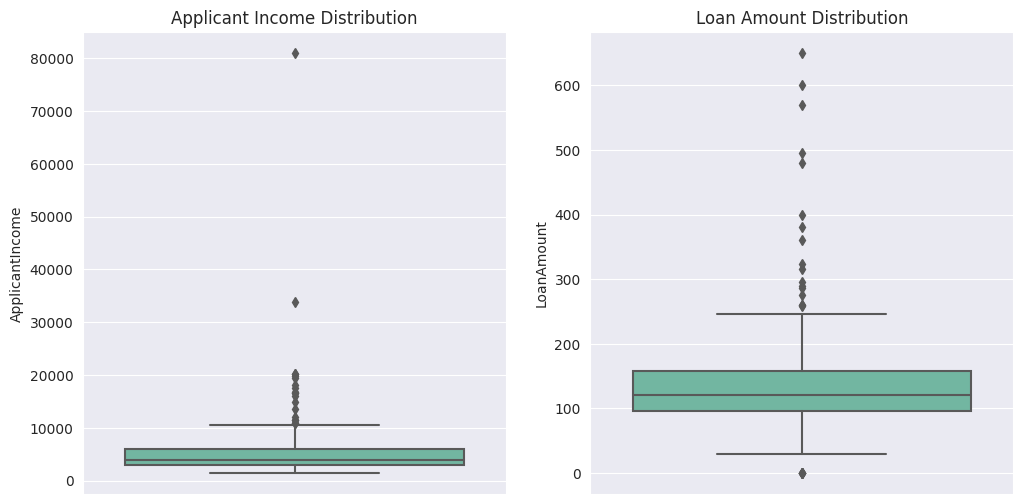

In [141]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.boxplot(y='ApplicantIncome', data=df, ax=axs[0], palette='Set2')
axs[0].set_title('Applicant Income Distribution')

sns.boxplot(y='LoanAmount', data=df, ax=axs[1], palette='Set2')
axs[1].set_title('Loan Amount Distribution')

plt.show()

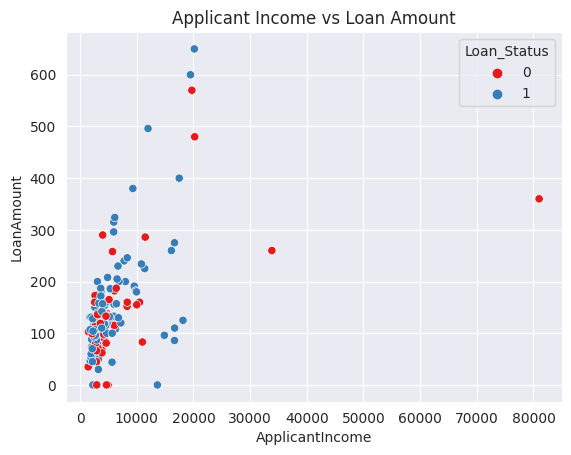

In [142]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, hue='Loan_Status', palette='Set1')
plt.title('Applicant Income vs Loan Amount')
plt.show()

### <font color='teal'> Splitting the data</font>

In [143]:
# Splitting the data into independent variables (X) and dependent variable (y)
x = df.iloc[:, :-1]   # select all columns except the last column
y = df.iloc[:, -1]    # select the last column

### <font color='teal'> Applying scaling  </font>

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler (feature_range=(0, 1))

x_train_scaled= scaler.fit_transform(x_train)
y_train= pd.DataFrame(x_train_scaled)

x_test_scaled=scaler.fit_transform(x_test)
y_test= pd.DataFrame(x_test_scaled)

### <font color='teal'> Scaling the data </font>

In [144]:
from sklearn.model_selection import train_test_split 
train, test=train_test_split(df, test_size = 0.3, random_state=42)

x_train= train.drop('Loan_Status', axis=1)
y_train = train['Loan_Status']

x_test= test.drop('Loan_Status', axis=1)
y_test = test['Loan_Status']

In [128]:
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of train: (123, 11)
Shape of test: (54, 11)
Shape of x_train: (123, 10)
Shape of y_train: (123,)
Shape of x_test: (54, 10)
Shape of y_test: (54,)


### <font color='teal'> Import and apply svm model   </font>

In [129]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=42,max_iter=500)

In [130]:
svc.fit(x_train,y_train)

SVC(max_iter=500, random_state=42)

In [131]:
y_pred = svc.predict(x_test)

### <font color='teal'> Calculate accuracy score </font>

In [132]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.7407407407407407


### <font color='teal'> Thank you </font>